In [1]:
"""
Import necessary libraries
"""

import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import math

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
"""
The "get_Phi" calculates the Phi matrix.
Parameters:
-x: Initial X vector
-dp: Polynomial degrees
-N: Number of points
Returns:
-The Phi matrix of shape N x dp+1
"""
def get_Phi(x, dp, D):
    phi_pol = x
    for i in range(2,dp+1):
       phi_pol = np.c_[phi_pol, x**(i)]
    phi_matrix = np.c_[np.ones((D,1)), phi_pol]
    return phi_matrix

"""
Calculate the mean theta vector.
Parameters:
-a: The variance of the noise distribution
-b: The theta variance
-train_set: The Phi matrix
-t: The Y vector of the training set
-id: Identity matrix
Returns:
-The estimated parameter vector (posterior pprobability parameters)
"""
def MuCoeff_Sigma(a, b, train_set, t, id):
    S = np.linalg.inv(a * id + b * train_set.T.dot(train_set))
    mean = b*(S).dot(train_set.T.dot(t))
    return S, mean


"""
Calculates the mean and the variance of the estimated Y vector
Parameters:
-x_test: The X vector of the test set
-dp: Polynomial degrees
-N: Number of points
-mu_th_y: The estimated parameter vector
-noise_var: Variance of the noise
-S: 
Returns:
-mu_y: A list of the means of the estimated Y points 
-sigma_y = A list of the variances of the estimated Y points
"""
def mu_sigma_y(x_test, dp, N, mu_th_y, noise_var, S):
    phi_matrix_test = get_Phi(x_test, dp, N)
    mu_y = np.sum(phi_matrix_test * mu_th_y, axis=1)

    sigma_y = noise_var + np.sum((phi_matrix_test @ S) * (phi_matrix_test), axis=1)

    return mu_y, sigma_y

In [3]:
"""
Parameters
"""
#How many points
N = 10

#Precision
a = 0.005

#Uncertainty of our knowledge of θ0
sigma_theta_sq = 1/a

b = 11.1
#Noise variance
sigma_htta_sq = 1/b

#Mean of the noise
mu_noise = 0

#Degree of polynomial
M = 9

#Idenity matrix
id_matrix = np.identity(M+1)

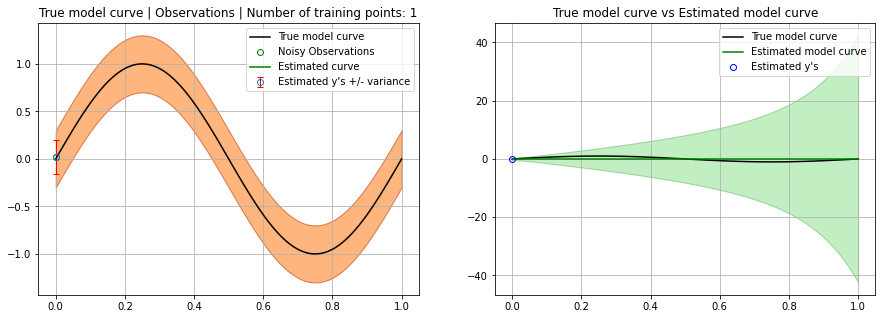

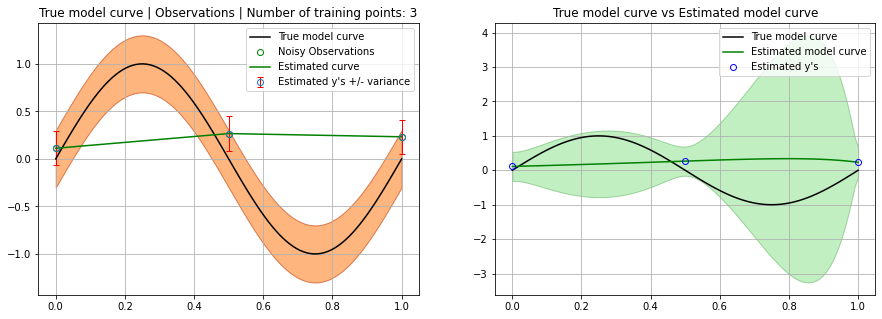

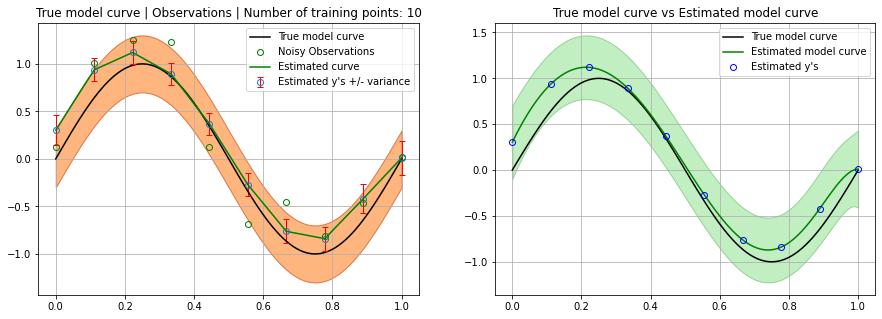

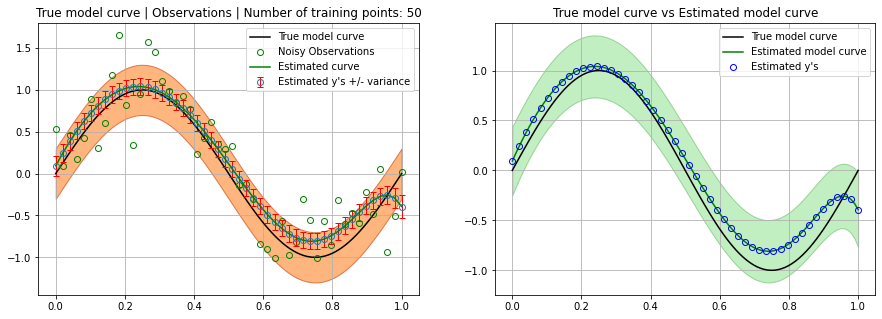

In [8]:
Ns = [1, 3, 10, 50]
for N in Ns:
    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    #Create points for the true model and for the test set
    X = np.linspace(0, 1, 100)
    X_phi_matrix = get_Phi(X, M, 100)

    #Create the true model curve points
    Y = np.sin(2*math.pi*X)

    #Create the training set
    #Get N equidistant points in the interval [0,1] for the training set
    x = np.linspace(0, 1, N)
    x_vector = np.sort(x)

    #Get the Phi matrix for the training set
    phi_matrix = get_Phi(x_vector, M, N)

    #Get the y vector (y_vector: without added noise, y_train_noise: with added noise)
    y_vector = np.sin(2*math.pi*x_vector)

    #Create noisy observations
    noise_train = np.random.normal(0, (1/b)**0.5, N)
    y_train_noise = np.add(y_vector, noise_train)

    #Get the mean theta given y vector
    S, MuCoeff = MuCoeff_Sigma(a, b, phi_matrix, y_train_noise, id_matrix)
    
    #Get the mean y's and the variance of y's for the training set
    mu_y, sigma_y = mu_sigma_y(x_vector, M, N, MuCoeff, sigma_htta_sq, S)

    #Get the mean y's and the variance of y's for the test set
    mu_y_test, sigma_y_test = mu_sigma_y(X, M, 100, MuCoeff, sigma_htta_sq, S)

    #Left plot: Create the true model curve +/- SD
    plt.subplot(121), plt.plot(X, Y, "k-", label="True model curve"), plt.fill_between(X, Y-(1/b)**0.5, Y+(1/b)**0.5, alpha=0.7, edgecolor='#CC4F1B', facecolor='#FF9848')
    #Rigth plot: Create the true model curve
    plt.subplot(122), plt.plot(X, Y, "k-", label="True model curve")
    #Rigth plot: Create the estimated model curve +/- SD and plot the estimated points
    plt.subplot(122), plt.plot(X, mu_y_test, "g-", label="Estimated model curve"), plt.fill_between(X, mu_y_test-np.sqrt(sigma_y_test), mu_y_test+np.sqrt(sigma_y_test), alpha=0.3, edgecolor='green', facecolor='limegreen'), plt.plot(x_vector, mu_y, "bo", mfc='none', label="Estimated y's")
    ##Left plot: Create the estimated model curve using the estimated y's and plot the noisy observations
    plt.subplot(121), plt.plot(x_vector, y_train_noise, "go", mfc='none', label="Noisy Observations"), plt.plot(x_vector, mu_y, "g-", label="Estimated curve"), plt.errorbar(x_vector, mu_y, yerr=sigma_y, linestyle='None', marker='o', mfc='none',elinewidth=1, capsize=3, ecolor = "r", label="Estimated y's +/- variance")

    plt.subplot(121), plt.grid(), plt.legend(), plt.title("True model curve | Observations | Number of training points: %s" % (N))
    plt.subplot(122), plt.grid(), plt.legend(), plt.title("True model curve vs Estimated model curve")

    plt.show()